## Linear Perceptron Classifier

In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class Perceptron():
    '''
    A classification algorithm in which Perceptron Loss function is optimized by Stochastic Sub-gradient Descent algorithm.
    
    Parameters
    ----------
    n_iter : int, default=1000
        The maximum number of passes over the training data (aka epochs).

    tol : float, default=1e-3
        The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

    warm_start : bool, default=False
        When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.

    n_iter_no_change : int, default=25
        Number of iterations with no improvement to wait before early stopping.

    Attributes
    ----------
    w : numpy array of shape (1, n_features + 1)
        Weights assigned to the features & bias(intercept) constant in decision function.

    history : list
        Loss values calculated at every iteration.
    '''

    def __init__(self, n_iter=1000, tol=1e-3, warm_start=False, n_iter_no_change=25):
        self.n_iter = n_iter
        self.tol = tol
        self.warm_start = warm_start
        self.n_iter_no_change = n_iter_no_change
        self.w = None
        self.history = None
    
    def decision_function(self, X):
        '''
        Predict confidence scores for samples.
        The confidence score for a sample is proportional to the signed distance of that sample to the hyperplane.

        Parameters
        ----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            Samples.

        Returns
        -------
        scores : array, shape=(n_samples,)
            Confidence scores per sample where >0 means class +1 would be predicted and <0 means class -1 would be predicted.
        '''

        n_samples, n_features = X.shape
        n_weights = self.w.shape[0]

        # Add a constant feature in X for bias calculation if (n_features != n_weights)
        if (n_features != n_weights):
            X = np.c_[np.ones(n_samples), X]

        # Compute the scores for samples in X i.e. distance from hyperplane
        scores = np.dot(X, self.w)
        return scores

    def predict(self, X):
        '''
        Predict class labels for samples in X.

        Parameters
        ----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            Samples.

        Returns
        -------
        C : array, shape [n_samples]
            Predicted class label per sample.
        '''

        # Predict the class labels from scores
        scores = self.decision_function(X)
        C = np.where(scores>0, 1 ,-1)
        return C

    def score(self, X, y):
        '''
        Return the mean accuracy on the given test data and labels.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,)
            True labels for `X`.

        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` wrt. `y`.
            The best performance is 1.
        '''

        # Predict the class labels for X
        y_pred = self.predict(X)

        # Compute the accuracy of predicted labels
        score = y == y_pred
        return np.average(score)

    def loss(self, X, y):
        '''
        Return the total loss on the given test data and labels using perceptron loss function.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,)
            True labels for `X`.

        Returns
        -------
        loss : float
            Total perceptron loss on ``self.decision_function(X)``
            The best performance is 0.
        '''

        # Compute the confidence score for X
        scores = self.decision_function(X)

        # Compute the loss on every prediction
        l = np.multiply(y, scores) * -1
        loss = np.where(l > 0, l, 0)
        return np.sum(loss)

    def fit(self, X, y, weights_init=None, record_loss_history=False):
        ''' 
        Fit a binary classifier on X and y with Stochastic Gradient Descent algorithm

        Parameters
        ----------
        X : numpy array or sparse matrix of shape (n_samples, n_features)
            Training data.

        y : numpy array of shape (n_samples,)
            Target values.

        weights_init : numpy array of shape (1, n_features + 1)
            The initial coefficietns & intercept to warm-start the optimization.

        record_loss_history : bool, default=False
            Whether to record the loss after every update

        Returns
        -------
        self : object
            Returns an instance of self.
        '''

        np.random.seed(0)
        n_samples, n_features = X.shape
        
        # Initialize loss history & number of correct consecutive predictions
        self.history = []
        n_corr_consec_preds = 0

        # Initialize weights & bias constant with random value(s) if (warm_start = False)
        if (self.warm_start):
            self.w = weights_init
        else:
            self.w = np.random.rand(n_features + 1)

        # Add a constant feature in X for bias calculation
        X = np.c_[np.ones(n_samples), X]

        for _ in range(self.n_iter):
            # Pick a random data point
            idx = np.random.randint(n_samples)
            
            # Update the weights & reset the number of correct consecutive predictions on misclassification
            if(self.decision_function(X[[idx]]) * y[idx] < 0):
                self.w += y[idx] * X[idx]
                n_corr_consec_preds = 0

                # Append total loss for updated weights to the list if (record_loss_history = True)
                if (record_loss_history):
                    self.history.append(self.loss(X, y))
                    
            # Increment the number of correct consecutive predictions otherwise
            else:
                n_corr_consec_preds += 1
            
            # Check for convergence, stop iterations when (n_corr_consec_preds >= n_iter_no_change)
            if (n_corr_consec_preds == self.n_iter_no_change):
                break
            
        return self

The perceptron algorithm has been coded up in `Perceptron.fit(X, y[, weights_init, ...])` method of class `Perceptron`. It learns a linear classification model by optimizing perceptron loss using Stochastic Gradient Descent algorithm.

## Data set

In [5]:
# Load the dataset into a dataframe
column_names = ['variance_of_wavelet_transformed', 'skewness_of_wavelet_transformed', 'curtosis_of_wavelet_transformed', 'entropy_of_image', 'counterfeit']
data = pd.read_csv('./Datasets/data_banknote_authentication.csv', names=column_names)

n_rows, n_columns = data.shape
print(f'Number of rows = {n_rows} \nNumber of columns = {n_columns}')
data.head()

Number of rows = 1372 
Number of columns = 5


,variance_of_wavelet_transformed,skewness_of_wavelet_transformed,curtosis_of_wavelet_transformed,entropy_of_image,counterfeit
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


The data file `data_banknote_authentication.csv` is the source of information for the classification problem. The number of instances (rows) in the data set is 1372, and the number of variables (columns) is 5.

This problem has the following variables:
- `variance_of_wavelet_transformed`, used as input.
- `skewness_of_wavelet_transformed`, used as input.
- `curtosis_of_wavelet_transformed`, used as input.
- `entropy_of_image`, used as input.
- `counterfeit`, used as the target. It can only have two values: 0 (non-counterfeit) or 1 (counterfeit).

## Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   variance_of_wavelet_transformed  1372 non-null   float64
 1   skewness_of_wavelet_transformed  1372 non-null   float64
 2   curtosis_of_wavelet_transformed  1372 non-null   float64
 3   entropy_of_image                 1372 non-null   float64
 4   counterfeit                      1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


`Info()` method of Pandas shows that there are 1372 non-null `float64` values for the first 4 variables (aka features) and 1372 non-null class labels of type `int64`.

For perceptron binary classifier to work, 0/1 class labels must be transformed to negative & positive labels respectively.
- class -1 means non-counterfeit
- class +1 means counterfeit

In [7]:
# Transform the class labels to +1/-1
data.counterfeit.where(data.counterfeit > 0, other=-1, inplace=True)

# Split the dataset into features (X) and labels (y)
features = data.drop('counterfeit', axis=1)
labels = data.counterfeit

# Scale the features with min-max normalization
features = (features - features.min()) / (features.max() - features.min())

Dataset has been split into features and labels. Features have been scaled using min-max normalization and class labels have been transformed from 0/1 to -1/+1. Data has been preprocessed and `Percpetron.predict(X)` method has been defined in class `Perceptron` to make predictions for banknotes dataset.

## K-Fold Cross-Validation

In [8]:
def cross_validate(Perceptron, X, y=None, n_folds=10, init_params=None):
    '''
    Train the model on the dataset using cross-validation and evaluate metric(s).

    Parameters
    ----------
    model : model object implementing 'fit'
        The object to use to fit the data.

    X : array-like of shape (n_samples, n_features)
        The data to fit.

    y : array-like of shape (n_samples,), default=None
        The target variable to try to predict in the case of supervised learning.

    n_folds : int, default=10
        The number of folds in KFold Cross Validation.

    init_param : dict, default=None
        Dictionary of parameters to init model object with.

    Returns
    -------
    ret : dict of float arrays of shape (n_splits,)
        Array of scores of the model for each run of the cross validation.

        A dict of arrays containing the score arrays for each scorer is returned. The possible keys for this ``dict`` are:
            ``test_score``
                The array for test scores on each cv split.

            ``test_loss``
                The array for test losses on each cv split.

            ``model``
                The model objects for each cv split.
    '''

    n_samples, _ = X.shape

    # Initialize dict of empty arrays for (test_score, train_score, model)
    ret = {}
    ret['test_score'] = np.empty(n_folds, dtype=float)
    ret['test_loss'] = np.empty(n_folds, dtype=float)
    ret['model'] = np.empty(n_folds, dtype=object)

    # Size of a fold for the given number of folds (n_folds)
    fold_size = int(n_samples / n_folds)

    # Iterate over each fold to test the (model)
    for i in range(0, n_folds):

        # Create an array of indices for test set, for eg, when (i = 0), indices will be [0...fold_size] and so on
        idx = np.arange(i*fold_size, (i+1)*fold_size)

        # Set ith fold as test set & rest as train set
        X_test, y_test = X[idx].copy(), y[idx].copy()
        X_train, y_train = np.delete(X, idx, axis=0), np.delete(y, idx, axis=0)

        # Init the Perceptron model & test it on ith fold after trainig it on rest of the folds
        model = Perceptron(n_iter=init_params['n_iter'], n_iter_no_change=init_params['n_iter_no_change'])

        ret['model'][i] = model.fit(X_train, y_train)
        ret['test_loss'][i] = model.loss(X_test, y_test)
        ret['test_score'][i] = model.score(X_test, y_test)

    return ret

## Training the algorithm using cross-validation

In [15]:
# Hold out 20% of total data
np.random.seed(0)
msk = np.random.rand(len(data)) < 0.8
X_train, y_train = features[msk].to_numpy(), labels[msk].to_numpy()

# Cross-validate over rest of the data
cv_result = cross_validate(Perceptron, X_train, y_train, init_params={'n_iter':10000, 'n_iter_no_change':75})

# Calculate the average test loss over all the folds
cv_val_loss = np.average(cv_result['test_loss'])

# Calculate the average test accuracy score over all the folds
cv_val_score = np.average(cv_result['test_score'])

print(f"Validation set loss = {cv_val_loss}\nValidation set error = {1 - cv_val_score}")
print(f"Validation set accuracy = {np.round(cv_val_score*100, decimals=3)} %")

Validation set loss = 2.17190525921428
Validation set error = 0.05185185185185193
Validation set accuracy = 94.815 %


Perceptron model has been trained on the data set (after holding out a test set i.e. `(X_val, y_val)`) using cross-validation. Validation set error which is one minus average validation set accuracy score over all the folds has been reported.

## F1 Score

In [10]:
def f1_score(y_true, y_pred, target_class=1):
    '''
    Compute the F1 score, also known as balanced F-score or F-measure.
    
    The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are
    equal. The formula for the F1 score is::
        F1 = 2 * (precision * recall) / (precision + recall)

    Parameters
    ----------
    y_true : 1d array-like, or label indicator array
        Ground truth (correct) target values.

    y_pred : 1d array-like, or label indicator array
        Estimated targets as returned by a classifier.

    target_class : int, default=1
        Target class to compute the F1 score for.

    Returns
    -------
    f1_score : float
        F1 score of the positive class in binary classification.
    '''

    # Set the target class label as 1 and rest as 0
    y_pred = np.where(y_pred == target_class, 1, 0)
    y_true = np.where(y_true == target_class, 1, 0)

    # Find the number of True target class labels, i.e. the number of instances when both predicted & actual labels are 1 and hence their sum is 2
    true_pos = np.sum(np.where(y_pred + y_true == 2, 1, 0))

    # Find the number of predicted target class labels 
    pred_pos = np.sum(np.where(y_pred > 0, 1, 0))

    # Find the number of actual target class labels
    actual_pos = np.sum(np.where(y_true > 0, 1, 0))

    # Calculate Precision & Recall for target class
    precision = true_pos / pred_pos
    recall = true_pos / actual_pos

    # Calculate & return F1 score for target class 
    return 2 * (precision * recall) / (precision + recall)

## Evaluation using F1 score

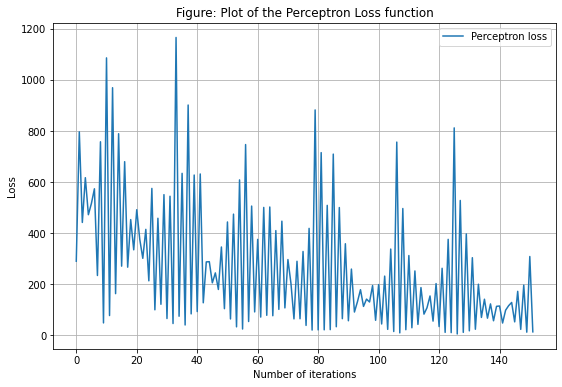

In [16]:
# Held out test set (20% of total data)
X_test, y_test = features[~msk].to_numpy(), labels[~msk].to_numpy()

# Train the model on rest of data (80% of total data)
model = Perceptron(n_iter_no_change=75)
model.fit(X_train, y_train, record_loss_history=True)

# Visualize training loss
plt.figure(figsize=(9,6))
plt.plot(model.history, label='Perceptron loss')
plt.title('Figure: Plot of the Perceptron Loss function')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Training loss decreases with the number of iterations and the algorithm converges after `n_iter_no_change` (=75) consecutive iterations with no change in weights because of correct classification.

In [17]:
# Test set accuracy score for class predictions
test_score = model.score(X=X_test, y=y_test)

# Test set loss for class predictions
test_loss = model.loss(X=X_test, y=y_test)

# Test set F1 score for Class +1
f1_pos_score = f1_score(y_true=y_test, y_pred=model.predict(X_test), target_class=+1)

# Test set F1 score for Class -1
f1_neg_score = f1_score(y_true=y_test, y_pred=model.predict(X_test), target_class=-1)

print(f"Test set loss = {test_loss}")
print(f"Test set accuracy = {np.round(test_score * 100, decimals=3)} %")
print(f"F1 score for Class +1 = {f1_pos_score}")
print(f"F1 score for Class -1 = {f1_neg_score}")

Test set loss = 2.273589424341566
Test set accuracy = 97.552 %
F1 score for Class +1 = 0.974910394265233
F1 score for Class -1 = 0.9761092150170648


F1 score on the held out test set has been reported for class +1 and class -1.